<a href="https://colab.research.google.com/github/anushkrishnav/FinAlgo/blob/main/LSTM/Keras/Stock_Price_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip3 install yfinance

     |████████████████████████████████| 6.3MB 3.6MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.59-py2.py3-none-any.whl size=23455 sha256=730caba4057fecfaf08af3811d7fe57bb7ed36a94ab1aa29cdfda242ea7353e1
  Stored in directory: /root/.cache/pip/wheels/f8/2a/0f/4b5a86e1d52e451757eb6bc17fd899629f0925c777741b6d04
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [5]:
import pandas as pd
import numpy as np
import tensorflow as tf 
import matplotlib.pyplot as plt
import time
import yfinance as yf

Stock forecating using Hourly Data using Keras and Tensorflow (LSTM-RNN)

In [6]:
df = yf.download(tickers='MSFT',period='1y',interval='60m')

[*********************100%***********************]  1 of 1 completed


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1757 entries, 2020-06-10 09:30:00-04:00 to 2021-06-09 15:30:00-04:00
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1757 non-null   float64
 1   High       1757 non-null   float64
 2   Low        1757 non-null   float64
 3   Close      1757 non-null   float64
 4   Adj Close  1757 non-null   float64
 5   Volume     1757 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 96.1 KB


In [8]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2020-06-10 09:30:00-04:00,191.125000,193.649994,191.009995,192.899994,192.899994,8973090
2020-06-10 10:30:00-04:00,192.910004,193.970001,192.710007,193.649994,193.649994,4063615
2020-06-10 11:30:00-04:00,193.649994,194.419998,192.809998,194.356995,194.356995,3265988
2020-06-10 12:30:00-04:00,194.354996,196.270706,194.085007,195.910004,195.910004,5472909
2020-06-10 13:30:00-04:00,195.899994,197.970001,194.750000,197.884995,197.884995,6382227


In [11]:
train = df[['Close']] 

In [12]:
type(df["Close"]) == type(df[["Close"]])

False

In [13]:
train.describe()

,Close
count,1757.000000
mean,223.751309
std,17.960315
min,186.250000
25%,210.249207
50%,217.809998
75%,239.089996
max,262.179993


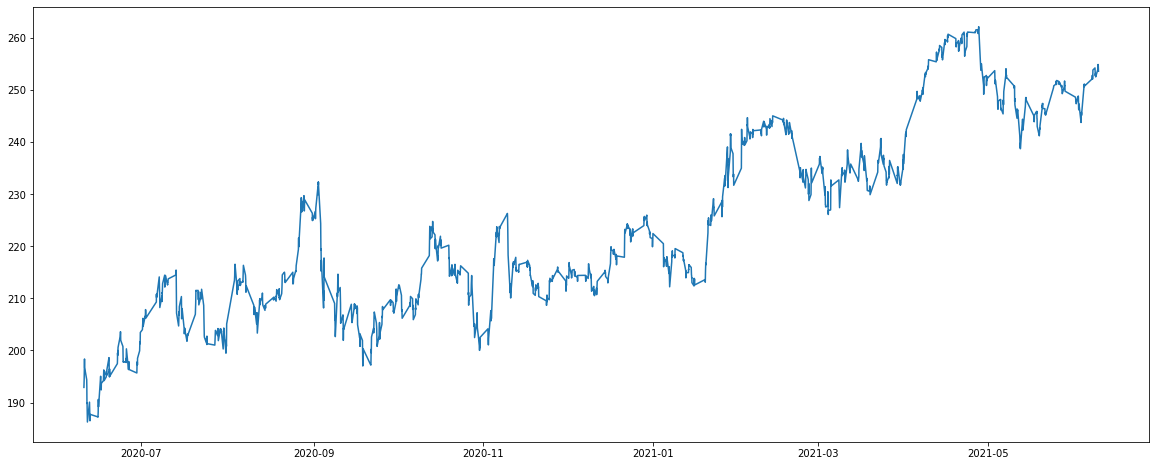

In [15]:
plt.figure(1,figsize=(20,8))
_ = plt.plot(train.Close)

# Working on Feature 

## Percetage change
Aim : We will be using % change to predict the prices instead of actual prices
Reason: cause its bit normalised and easier to compare and forcast, better statistical properties. We man a stationary time series because stat properties such as mean, variance, correlation are constant over time



In [17]:
train["returns"] = train.Close.pct_change() // %change does is  Returns(N) =  Close(N) - Close (N-1)
train.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Close,returns
Datetime,,
2020-06-10 09:30:00-04:00,192.899994,NaN
2020-06-10 10:30:00-04:00,193.649994,0.003888
2020-06-10 11:30:00-04:00,194.356995,0.003651
2020-06-10 12:30:00-04:00,195.910004,0.007990
2020-06-10 13:30:00-04:00,197.884995,0.010081


## Log Returns
Formula : r[i] = (P[i] - P[j])/P[j] where r is returns ar time i , P is price and j = i-1

Reason : it helps us to measure all var in comparable metric